<a href="https://colab.research.google.com/github/abdelrahmanEmad5005/LGMVIP--DataScience-Task-2/blob/main/stock_Market_Prediction_And_Forecasting_Using_Stacked_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries And Read Data**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [32]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"

In [33]:
Stock_market = pd.read_csv(url, index_col = "Date", parse_dates=True)

##**Exploring The Data**


In [34]:
Stock_market.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [35]:
Stock_market.info

<bound method DataFrame.info of               Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
...            ...     ...     ...     ...     ...                   ...   
2010-07-27  117.60  119.50  112.00  118.80  118.65                586100   
2010-07-26  120.10  121.00  117.10  117.10  117.60                658440   
2010-07-23  121.80  121.95  120.25  120.35  120.65                281312   
2010-07-22  120.30  122.00  120.25  120.75  120.90                293312   
2010-07-21  122.10  123.00  121.05  121.10  121.55      

In [36]:
Stock_market.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


##**Prepare Data**

Text(0.5, 1.0, 'Close Values')

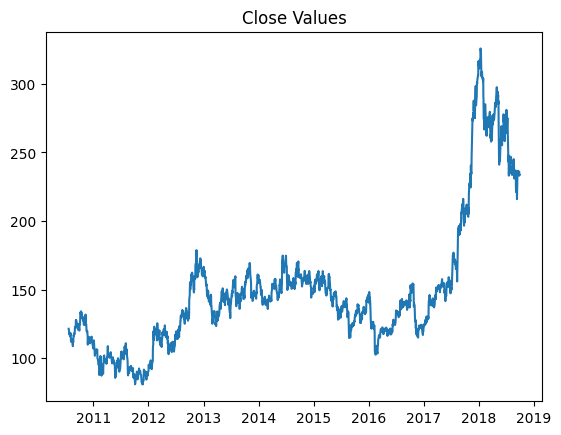

In [37]:
# Plot The Target Value
plt.plot(Stock_market["Close"])
plt.title("Close Values")

In [41]:
scaler = MinMaxScaler(feature_range = (0,1))
Stock_market_Scaled = scaler.fit_transform(Stock_market['Close'].values.reshape(-1,1))
Stock_market_Scaled

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [42]:
Training_size = int(0.7 * len(Stock_market_Scaled))
Test_size = len(Stock_market_Scaled) - Training_size
Train_data, Test_data = Stock_market_Scaled[:Training_size], Stock_market_Scaled[Training_size:]

In [43]:
len(Train_data) + len(Test_data) == len(Close_Stock_market_Scaled)

True

In [44]:
def Create_Dataset(Dataset, Time_step=1):
  dataX, dataY = [], []
  for i in range(len(Dataset)-Time_step-1):
    a = Dataset[i:(i+Time_step), 0]
    dataX.append(a)
    dataY.append(Dataset[i+Time_step, 0])
  return np.array(dataX), np.array(dataY)

In [46]:
Time_step = 50
X_train, y_train = Create_Dataset(Train_data, Time_step)
X_test, y_test = Create_Dataset (Test_data, Time_step)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1373, 50)
(1373,)
(560, 50)
(560,)


In [48]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

##**Create Model**

In [50]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(Time_step,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer = "adam")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Fit The Model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
22/22 [==============================] - 9s 155ms/step - loss: 0.0240
Epoch 2/100
22/22 [==============================] - 3s 121ms/step - loss: 0.0028
Epoch 3/100
22/22 [==============================] - 3s 121ms/step - loss: 0.0017
Epoch 4/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0016
Epoch 5/100
22/22 [==============================] - 2s 110ms/step - loss: 0.0015
Epoch 6/100
22/22 [==============================] - 3s 145ms/step - loss: 0.0014
Epoch 7/100
22/22 [==============================] - 2s 100ms/step - loss: 0.0013
Epoch 8/100
22/22 [==============================] - 2s 101ms/step - loss: 0.0013
Epoch 9/100
22/22 [==============================] - 2s 101ms/step - loss: 0.0012
Epoch 10/100
22/22 [==============================] - 2s 101ms/step - loss: 0.0011
Epoch 11/100
22/22 [==============================] - 4s 162ms/step - loss: 0.0011
Epoch 12/100
22/22 [==============================] - 2s 101ms/step - loss: 0.0010
Epoch 13/100


In [53]:
# Evaluate the model
Train_loss = model.evaluate(X_train, y_train)
print(Train_loss)
Test_loss = model.evaluate(X_test, y_test)
print(Test_loss)

43/43 [==============================] - 1s 26ms/step - loss: 2.4505e-04
0.0002450471802148968
18/18 [==============================] - 0s 24ms/step - loss: 1.9403e-04
0.00019402719044592232


In [54]:
# Make Predictions
Train_pred = model.predict(X_train)
Test_pred = model.predict(X_test)
# Invert The Predictions To It's Original Range
Train_pred = scaler.inverse_transform(Train_pred)
Test_pred = scaler.inverse_transform(Test_pred)

18/18 [==============================] - 0s 24ms/step


In [55]:
# Calculate RMSE For Training
train_error = np.sqrt(mean_squared_error(y_train, Train_pred))
print(train_error)

168.1372581804799


In [56]:
# Calculate RMSE For Testing
test_error = np.sqrt(mean_squared_error(y_test, Test_pred))
print(test_error)

110.50308070945708


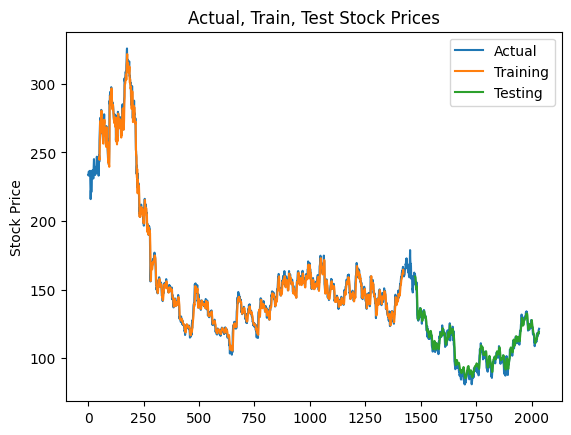

In [61]:
look_back=50
# shift train predictions for plotting
trainPredictPlot = np.empty_like(Stock_market_Scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(Train_pred)+look_back, :] = Train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(Stock_market_Scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(Train_pred)+(look_back*2)+1:len(Stock_market_Scaled)-1, :] = Test_pred
# plot baseline , Train , Test
plt.plot(scaler.inverse_transform(Stock_market_Scaled), label="Actual")
plt.plot(trainPredictPlot, label="Training")
plt.plot(testPredictPlot, label="Testing")
plt.ylabel("Stock Price")
plt.title("Actual, Train, Test Stock Prices")
plt.legend()
plt.show()